# Wranglers

In this notebook we give a brief overview of wrangling with NetCDF-SCM.

In [1]:
# NBVAL_IGNORE_OUTPUT
import glob
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymagicc

<IPython.core.display.Javascript object>

In [2]:
plt.style.use('bmh') 
%matplotlib inline

## Wrangling help

The wrangling help can be accessed via our command line interface.

In [3]:
# NBVAL_IGNORE_OUTPUT
!netcdf-scm-wrangle -h

Usage: netcdf-scm-wrangle [OPTIONS] SRC DST WRANGLE_CONTACT

  Wrangle NetCDF-SCM ``.nc`` files into other formats and directory
  structures.

  ``src`` is searched recursively and netcdf-scm will attempt to wrangle all
  the files found.

  ``wrangle_contact`` is written into the header of the output files.

Options:
  --regexp TEXT                   Regular expression to apply to file
                                  directory (only wrangles matches).
                                  [default: ^(?!.*(fx)).*$]
  --prefix TEXT                   Prefix to apply to output file names (not
                                  paths).
  --out-format [mag-files|mag-files-average-year-start-year|mag-files-average-year-mid-year|mag-files-average-year-end-year|mag-files-point-start-year|mag-files-point-mid-year|mag-files-point-end-year|magicc-input-files|magicc-input-files-average-year-start-year|magicc-input-files-average-year-mid-year|magicc-input-files-average-year-end-year|magicc-input-file

## MAG file wrangling

The most common format to wrangle to is the `.MAG` format. This is a custom MAGICC format (see https://pymagicc.readthedocs.io/en/latest/file_conventions.html#the-future). We can wrangle data which has already been crunched to this format as shown below.

In [4]:
# NBVAL_IGNORE_OUTPUT
!netcdf-scm-wrangle "../tests/test-data/expected-crunching-output/cmip6output/CMIP6/CMIP/NCAR" "../output-examples/wrangled-files" "notebook example <email address>" --force --drs "CMIP6Output" --out-format "mag-files" --regexp ".*cSoilFast.*"

2019-11-01 09:35:41,332 INFO:netcdf_scm:netcdf-scm: 2.0.0-alpha.2+42.gf589f2f.dirty
2019-11-01 09:35:41,332 INFO:netcdf_scm:wrangle_contact: notebook example <email address>
2019-11-01 09:35:41,332 INFO:netcdf_scm:source: /Users/znicholls/Documents/AGCEC/Misc/netcdf-scm/tests/test-data/expected-crunching-output/cmip6output/CMIP6/CMIP/NCAR
2019-11-01 09:35:41,332 INFO:netcdf_scm:destination: /Users/znicholls/Documents/AGCEC/Misc/netcdf-scm/output-examples/wrangled-files
2019-11-01 09:35:41,333 INFO:netcdf_scm:regexp: .*cSoilFast.*
2019-11-01 09:35:41,333 INFO:netcdf_scm:prefix: None
2019-11-01 09:35:41,333 INFO:netcdf_scm:drs: CMIP6Output
2019-11-01 09:35:41,333 INFO:netcdf_scm:out_format: mag-files
2019-11-01 09:35:41,333 INFO:netcdf_scm:force: True
2019-11-01 09:35:41,333 INFO:netcdf_scm:Finding directories with files
2019-11-01 09:35:41,338 INFO:netcdf_scm:Found 1 directories with files
2019-11-01 09:35:41,339 INFO:netcdf_scm:Processing in parallel with 4 workers
2019-11-01 09:35:41,

We can then load the `.MAG` files using Pymagicc.

In [5]:
written_files = [f for f in Path("../output-examples/wrangled-files/flat").rglob("*.MAG")]
written_files

[PosixPath('../output-examples/wrangled-files/flat/netcdf-scm_cSoilFast_Lmon_CESM2_historical_r7i1p1f1_gn_195701-195703.MAG')]

In [6]:
wrangled = pymagicc.io.MAGICCData(str(written_files[0]))

In [7]:
wrangled.timeseries()

time                                                                                            1957-01-15 12:00:00  \
model       scenario    region                         variable  unit       climate_model todo                        
unspecified unspecified World                          cSoilFast kgmsuper-2 unspecified   SET              0.085600   
                        World|Land                     cSoilFast kgmsuper-2 unspecified   SET              0.085600   
                        World|Northern Hemisphere      cSoilFast kgmsuper-2 unspecified   SET              0.097727   
                        World|Northern Hemisphere|Land cSoilFast kgmsuper-2 unspecified   SET              0.097727   
                        World|Southern Hemisphere      cSoilFast kgmsuper-2 unspecified   SET              0.060421   
                        World|Southern Hemisphere|Land cSoilFast kgmsuper-2 unspecified   SET              0.060421   

time                                                                                            1957-02-14 00:00:00  \
model       scenario    region                         variable  unit       climate_model todo                        
unspecified unspecified World                          cSoilFast kgmsuper-2 unspecified   SET              0.085547   
                        World|Land                     cSoilFast kgmsuper-2 unspecified   SET              0.085547   
                        World|Northern Hemisphere      cSoilFast kgmsuper-2 unspecified   SET              0.097910   
                        World|Northern Hemisphere|Land cSoilFast kgmsuper-2 unspecified   SET              0.097910   
                        World|Southern Hemisphere      cSoilFast kgmsuper-2 unspecified   SET              0.059879   
                        World|Southern Hemisphere|Land cSoilFast kgmsuper-2 unspecified   SET              0.059879   

time                                                                                            1957-03-15 12:00:00  
model       scenario    region                         variable  unit       climate_model todo                       
unspecified unspecified World                          cSoilFast kgmsuper-2 unspecified   SET              0.085422  
                        World|Land                     cSoilFast kgmsuper-2 unspecified   SET              0.085422  
                        World|Northern Hemisphere      cSoilFast kgmsuper-2 unspecified   SET              0.098135  
                        World|Northern Hemisphere|Land cSoilFast kgmsuper-2 unspecified   SET              0.098135  
                        World|Southern Hemisphere      cSoilFast kgmsuper-2 unspecified   SET              0.059024  
                        World|Southern Hemisphere|Land cSoilFast kgmsuper-2 unspecified   SET              0.059024

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working


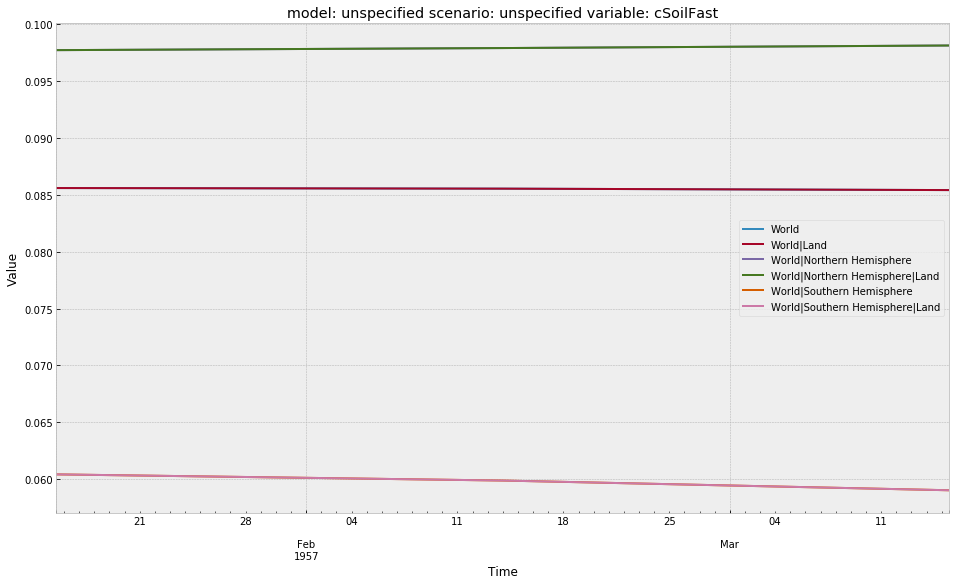

In [8]:
# NBVAL_IGNORE_OUTPUT
wrangled.line_plot(color="region", figsize=(16, 9))

### Adjusting units

The units of the wrangled data are `kgmsuper-2`. This might not be super helpful. As such, `netcdf-scm-wrangle` allows users to specify a csv which defines the target units to use for variables when wrangling.

The conversion csv should look like the below.

In [9]:
conv_csv = pd.DataFrame(
    [["cSoilFast", "t / m**2"], ["tos", "K"]], columns=["variable", "unit"]
)
conv_csv_path = "../output-examples/conversion-new-units.csv"
conv_csv.to_csv(conv_csv_path, index=False)
with open(conv_csv_path) as f:
    conv_csv_content = f.read()

print(conv_csv_content)

variable,unit
cSoilFast,t / m**2
tos,K



With such a csv, we can now crunch to our desired units.

In [10]:
# NBVAL_IGNORE_OUTPUT
!netcdf-scm-wrangle "../tests/test-data/expected-crunching-output/cmip6output/CMIP6/CMIP/NCAR" "../output-examples/wrangled-files-new-units" "notebook example <email address>" --force --drs "CMIP6Output" --out-format "mag-files" --regexp ".*cSoilFast.*" --target-units-specs "../output-examples/conversion-new-units.csv"

2019-11-01 09:35:49,992 INFO:netcdf_scm:netcdf-scm: 2.0.0-alpha.2+42.gf589f2f.dirty
2019-11-01 09:35:49,993 INFO:netcdf_scm:wrangle_contact: notebook example <email address>
2019-11-01 09:35:49,993 INFO:netcdf_scm:source: /Users/znicholls/Documents/AGCEC/Misc/netcdf-scm/tests/test-data/expected-crunching-output/cmip6output/CMIP6/CMIP/NCAR
2019-11-01 09:35:49,993 INFO:netcdf_scm:destination: /Users/znicholls/Documents/AGCEC/Misc/netcdf-scm/output-examples/wrangled-files-new-units
2019-11-01 09:35:49,993 INFO:netcdf_scm:regexp: .*cSoilFast.*
2019-11-01 09:35:49,993 INFO:netcdf_scm:prefix: None
2019-11-01 09:35:49,993 INFO:netcdf_scm:drs: CMIP6Output
2019-11-01 09:35:49,993 INFO:netcdf_scm:out_format: mag-files
2019-11-01 09:35:49,993 INFO:netcdf_scm:force: True
2019-11-01 09:35:49,997 INFO:netcdf_scm:Finding directories with files
2019-11-01 09:35:50,002 INFO:netcdf_scm:Found 1 directories with files
2019-11-01 09:35:50,003 INFO:netcdf_scm:Processing in parallel with 4 workers
2019-11-01

In [11]:
written_files = [f for f in Path("../output-examples/wrangled-files-new-units/flat").rglob("*.MAG")]
wrangled_new_units = pymagicc.io.MAGICCData(str(written_files[0]))
wrangled_new_units.timeseries()

time                                                                                          1957-01-15 12:00:00  \
model       scenario    region                         variable  unit     climate_model todo                        
unspecified unspecified World                          cSoilFast tperm**2 unspecified   SET              0.000086   
                        World|Land                     cSoilFast tperm**2 unspecified   SET              0.000086   
                        World|Northern Hemisphere      cSoilFast tperm**2 unspecified   SET              0.000098   
                        World|Northern Hemisphere|Land cSoilFast tperm**2 unspecified   SET              0.000098   
                        World|Southern Hemisphere      cSoilFast tperm**2 unspecified   SET              0.000060   
                        World|Southern Hemisphere|Land cSoilFast tperm**2 unspecified   SET              0.000060   

time                                                                                          1957-02-14 00:00:00  \
model       scenario    region                         variable  unit     climate_model todo                        
unspecified unspecified World                          cSoilFast tperm**2 unspecified   SET              0.000086   
                        World|Land                     cSoilFast tperm**2 unspecified   SET              0.000086   
                        World|Northern Hemisphere      cSoilFast tperm**2 unspecified   SET              0.000098   
                        World|Northern Hemisphere|Land cSoilFast tperm**2 unspecified   SET              0.000098   
                        World|Southern Hemisphere      cSoilFast tperm**2 unspecified   SET              0.000060   
                        World|Southern Hemisphere|Land cSoilFast tperm**2 unspecified   SET              0.000060   

time                                                                                          1957-03-15 12:00:00  
model       scenario    region                         variable  unit     climate_model todo                       
unspecified unspecified World                          cSoilFast tperm**2 unspecified   SET              0.000085  
                        World|Land                     cSoilFast tperm**2 unspecified   SET              0.000085  
                        World|Northern Hemisphere      cSoilFast tperm**2 unspecified   SET              0.000098  
                        World|Northern Hemisphere|Land cSoilFast tperm**2 unspecified   SET              0.000098  
                        World|Southern Hemisphere      cSoilFast tperm**2 unspecified   SET              0.000059  
                        World|Southern Hemisphere|Land cSoilFast tperm**2 unspecified   SET              0.000059

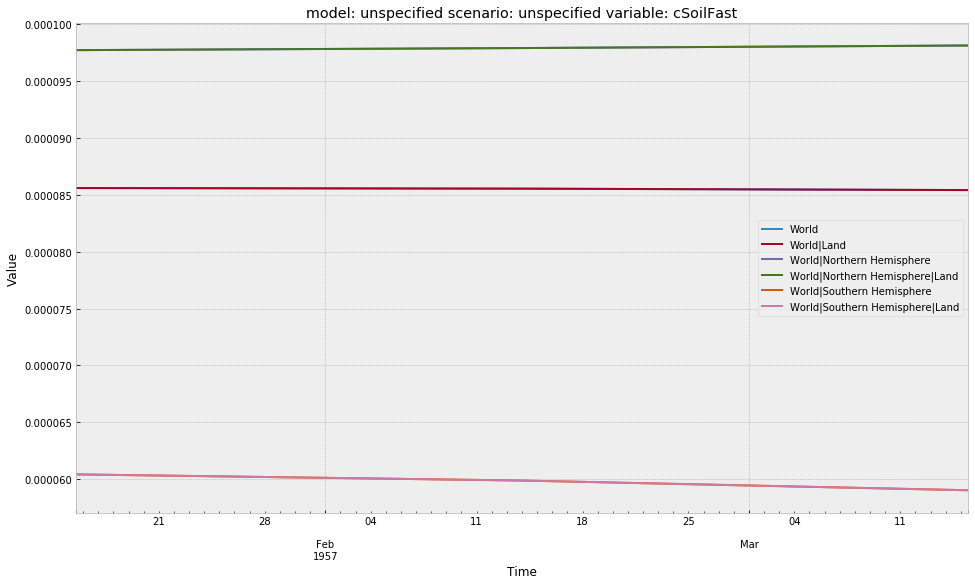

In [12]:
# NBVAL_IGNORE_OUTPUT
wrangled_new_units.line_plot(color="region", figsize=(16, 9))

#### Taking area sum

We can also set the units to include an area sum. For example, if we set our units to `Gt / yr` rather than `Gt / m**2 / yr` then the wrangler will automatically take an area sum of the data (weighted by the effective area used in the crunching) before returning the data.

In [13]:
conv_csv = pd.DataFrame(
    [["cSoilFast", "Gt"], ["tos", "K"]], columns=["variable", "unit"]
)
conv_csv_path = "../output-examples/conversion-area-sum-units.csv"
conv_csv.to_csv(conv_csv_path, index=False)
with open(conv_csv_path) as f:
    conv_csv_content = f.read()

print(conv_csv_content)

variable,unit
cSoilFast,Gt
tos,K



In [14]:
# NBVAL_IGNORE_OUTPUT
!netcdf-scm-wrangle "../tests/test-data/expected-crunching-output/cmip6output/CMIP6/CMIP/NCAR" "../output-examples/wrangled-files-area-sum-units" "notebook example <email address>" --force --drs "CMIP6Output" --out-format "mag-files" --regexp ".*cSoilFast.*" --target-units-specs "../output-examples/conversion-area-sum-units.csv"

2019-11-01 09:35:58,328 INFO:netcdf_scm:netcdf-scm: 2.0.0-alpha.2+42.gf589f2f.dirty
2019-11-01 09:35:58,328 INFO:netcdf_scm:wrangle_contact: notebook example <email address>
2019-11-01 09:35:58,328 INFO:netcdf_scm:source: /Users/znicholls/Documents/AGCEC/Misc/netcdf-scm/tests/test-data/expected-crunching-output/cmip6output/CMIP6/CMIP/NCAR
2019-11-01 09:35:58,328 INFO:netcdf_scm:destination: /Users/znicholls/Documents/AGCEC/Misc/netcdf-scm/output-examples/wrangled-files-area-sum-units
2019-11-01 09:35:58,328 INFO:netcdf_scm:regexp: .*cSoilFast.*
2019-11-01 09:35:58,329 INFO:netcdf_scm:prefix: None
2019-11-01 09:35:58,329 INFO:netcdf_scm:drs: CMIP6Output
2019-11-01 09:35:58,329 INFO:netcdf_scm:out_format: mag-files
2019-11-01 09:35:58,329 INFO:netcdf_scm:force: True
2019-11-01 09:35:58,332 INFO:netcdf_scm:Finding directories with files
2019-11-01 09:35:58,338 INFO:netcdf_scm:Found 1 directories with files
2019-11-01 09:35:58,338 INFO:netcdf_scm:Processing in parallel with 4 workers
2019-

In [15]:
written_files = [f for f in Path("../output-examples/wrangled-files-area-sum-units/flat").rglob("*.MAG")]
wrangled_area_sum_units = pymagicc.io.MAGICCData(str(written_files[0]))
wrangled_area_sum_units.timeseries()

time                                                                                      1957-01-15 12:00:00  \
model       scenario    region                         variable  unit climate_model todo                        
unspecified unspecified World                          cSoilFast Gt   unspecified   SET              12.79290   
                        World|Land                     cSoilFast Gt   unspecified   SET              12.79290   
                        World|Northern Hemisphere      cSoilFast Gt   unspecified   SET               9.85760   
                        World|Northern Hemisphere|Land cSoilFast Gt   unspecified   SET               9.85760   
                        World|Southern Hemisphere      cSoilFast Gt   unspecified   SET               2.93526   
                        World|Southern Hemisphere|Land cSoilFast Gt   unspecified   SET               2.93526   

time                                                                                      1957-02-14 00:00:00  \
model       scenario    region                         variable  unit climate_model todo                        
unspecified unspecified World                          cSoilFast Gt   unspecified   SET               12.7849   
                        World|Land                     cSoilFast Gt   unspecified   SET               12.7849   
                        World|Northern Hemisphere      cSoilFast Gt   unspecified   SET                9.8760   
                        World|Northern Hemisphere|Land cSoilFast Gt   unspecified   SET                9.8760   
                        World|Southern Hemisphere      cSoilFast Gt   unspecified   SET                2.9089   
                        World|Southern Hemisphere|Land cSoilFast Gt   unspecified   SET                2.9089   

time                                                                                      1957-03-15 12:00:00  
model       scenario    region                         variable  unit climate_model todo                       
unspecified unspecified World                          cSoilFast Gt   unspecified   SET              12.76610  
                        World|Land                     cSoilFast Gt   unspecified   SET              12.76610  
                        World|Northern Hemisphere      cSoilFast Gt   unspecified   SET               9.89873  
                        World|Northern Hemisphere|Land cSoilFast Gt   unspecified   SET               9.89873  
                        World|Southern Hemisphere      cSoilFast Gt   unspecified   SET               2.86740  
                        World|Southern Hemisphere|Land cSoilFast Gt   unspecified   SET               2.86740

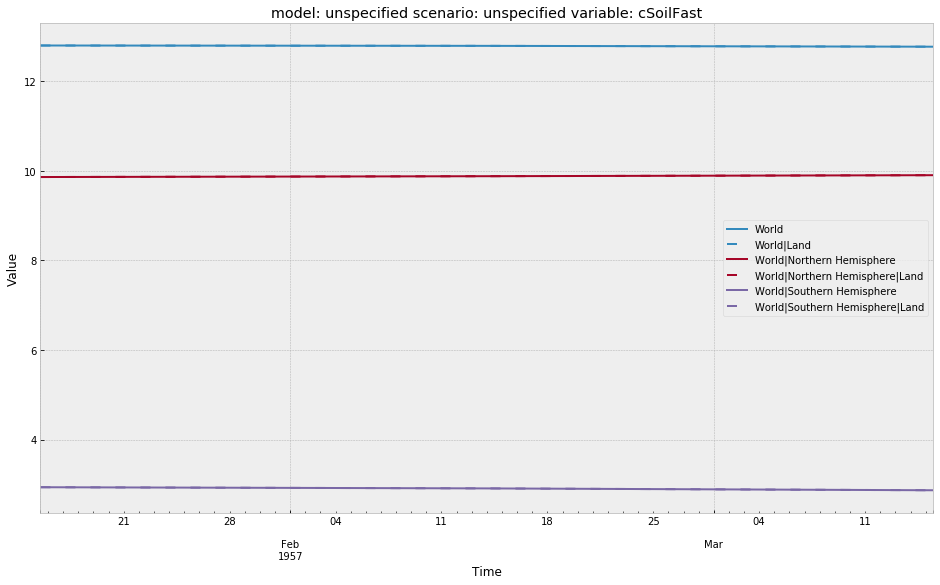

In [16]:
# NBVAL_IGNORE_OUTPUT
solid_regions = ["World", "World|Northern Hemisphere", "World|Southern Hemisphere"]
ax = wrangled_area_sum_units.filter(region=solid_regions).line_plot(
    color="region", linestyle="-", figsize=(16, 9)
)
wrangled_area_sum_units.filter(region=solid_regions, keep=False).line_plot(
    color="region", linestyle="--", dashes=(5, 7.5), ax=ax
)

As one last sanity check, we can make sure that the world total equals the regional total to within rounding errors.

In [17]:
np.testing.assert_allclose(
    wrangled_area_sum_units.filter(region="World").timeseries().values.squeeze(),
    wrangled_area_sum_units.filter(region=["World|Northern Hemisphere", "World|Southern Hemisphere"]).timeseries().sum().values.squeeze(),
    rtol=1e-5
)

### Time operations

The wrangling can also include a few basic time operations e.g. annual means or interpolation onto different grids. The different `out-format` codes follow those in [Pymagicc](https://github.com/openclimatedata/pymagicc/pull/272) (link to be updated once PR is merged). Here we show one example where we take the annual mean as part of the wrangling process.

In [18]:
# NBVAL_IGNORE_OUTPUT
!netcdf-scm-wrangle "../tests/test-data/expected-crunching-output/cmip6output/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl" "../output-examples/wrangled-files-average-year" "notebook example <email address>" --force --drs "CMIP6Output" --out-format "mag-files-average-year-mid-year"

2019-11-01 09:36:07,799 INFO:netcdf_scm:netcdf-scm: 2.0.0-alpha.2+42.gf589f2f.dirty
2019-11-01 09:36:07,800 INFO:netcdf_scm:wrangle_contact: notebook example <email address>
2019-11-01 09:36:07,800 INFO:netcdf_scm:source: /Users/znicholls/Documents/AGCEC/Misc/netcdf-scm/tests/test-data/expected-crunching-output/cmip6output/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl
2019-11-01 09:36:07,800 INFO:netcdf_scm:destination: /Users/znicholls/Documents/AGCEC/Misc/netcdf-scm/output-examples/wrangled-files-average-year
2019-11-01 09:36:07,800 INFO:netcdf_scm:regexp: ^(?!.*(fx)).*$
2019-11-01 09:36:07,800 INFO:netcdf_scm:prefix: None
2019-11-01 09:36:07,800 INFO:netcdf_scm:drs: CMIP6Output
2019-11-01 09:36:07,800 INFO:netcdf_scm:out_format: mag-files-average-year-mid-year
2019-11-01 09:36:07,800 INFO:netcdf_scm:force: True
2019-11-01 09:36:07,801 INFO:netcdf_scm:Finding directories with files
2019-11-01 09:36:07,802 INFO:netcdf_scm:Found 1 directories with files
2019-11-01 09:36:07,802 INFO:netcdf_scm

In [19]:
written_files = [f for f in Path("../output-examples/wrangled-files-average-year/flat").rglob("*.MAG")]
wrangled_annual_mean = pymagicc.io.MAGICCData(str(written_files[0]))
wrangled_annual_mean.timeseries()

time                                                                                      2840-07-01 00:00:00  \
model       scenario    region                          variable unit climate_model todo                        
unspecified unspecified World                           tas      K    unspecified   SET               285.883   
                        World|El Nino N3.4              tas      K    unspecified   SET               297.656   
                        World|Land                      tas      K    unspecified   SET               279.388   
                        World|North Atlantic Ocean      tas      K    unspecified   SET               291.011   
                        World|Northern Hemisphere       tas      K    unspecified   SET               286.566   
                        World|Northern Hemisphere|Land  tas      K    unspecified   SET               280.975   
                        World|Northern Hemisphere|Ocean tas      K    unspecified   SET               290.066   
                        World|Ocean                     tas      K    unspecified   SET               288.500   
                        World|Southern Hemisphere       tas      K    unspecified   SET               285.184   
                        World|Southern Hemisphere|Land  tas      K    unspecified   SET               276.052   
                        World|Southern Hemisphere|Ocean tas      K    unspecified   SET               287.289   

time                                                                                      2841-07-01 00:00:00  \
model       scenario    region                          variable unit climate_model todo                        
unspecified unspecified World                           tas      K    unspecified   SET               285.841   
                        World|El Nino N3.4              tas      K    unspecified   SET               296.947   
                        World|Land                      tas      K    unspecified   SET               279.379   
                        World|North Atlantic Ocean      tas      K    unspecified   SET               291.097   
                        World|Northern Hemisphere       tas      K    unspecified   SET               286.482   
                        World|Northern Hemisphere|Land  tas      K    unspecified   SET               280.939   
                        World|Northern Hemisphere|Ocean tas      K    unspecified   SET               289.951   
                        World|Ocean                     tas      K    unspecified   SET               288.444   
                        World|Southern Hemisphere       tas      K    unspecified   SET               285.185   
                        World|Southern Hemisphere|Land  tas      K    unspecified   SET               276.101   
                        World|Southern Hemisphere|Ocean tas      K    unspecified   SET               287.278   

time                                                                                      2842-07-01 00:00:00  \
model       scenario    region                          variable unit climate_model todo                        
unspecified unspecified World                           tas      K    unspecified   SET               285.847   
                        World|El Nino N3.4              tas      K    unspecified   SET               296.951   
                        World|Land                      tas      K    unspecified   SET               279.475   
                        World|North Atlantic Ocean      tas      K    unspecified   SET               290.916   
                        World|Northern Hemisphere       tas      K    unspecified   SET               286.411   
                        World|Northern Hemisphere|Land  tas      K    unspecified   SET               280.976   
                        World|Northern Hemisphere|Ocean tas      K    unspecified   SET               289.813   
                        World|Ocean        

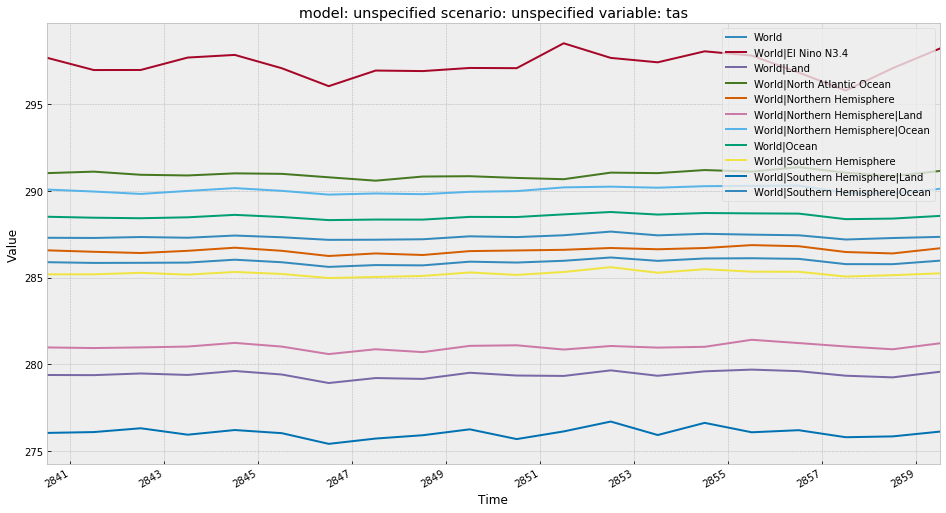

In [20]:
# NBVAL_IGNORE_OUTPUT
wrangled_annual_mean.line_plot(color="region", figsize=(16, 9))

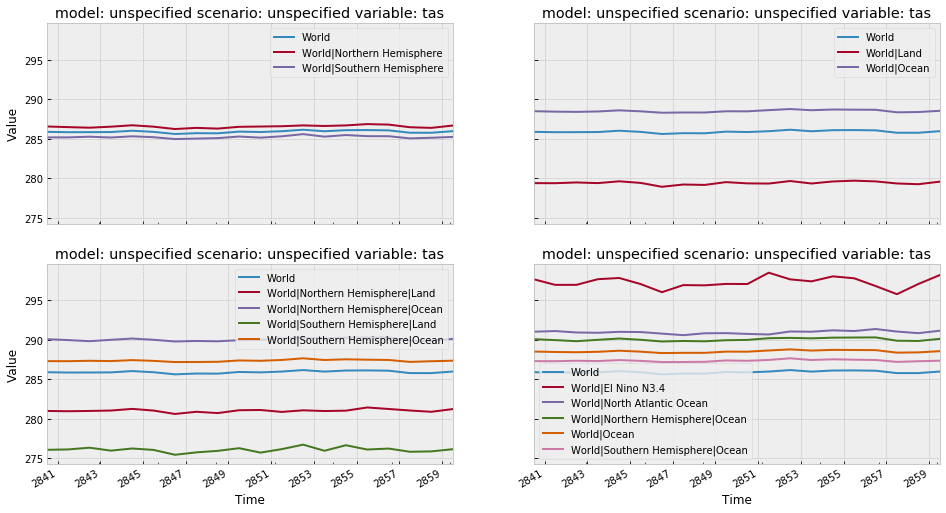

In [21]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(221)
wrangled_annual_mean.filter(region=["World", "World|*Hemisphere"]).line_plot(color="region", ax=ax)

ax = fig.add_subplot(222, sharey=ax, sharex=ax)
wrangled_annual_mean.filter(region=["World", "World|Land", "World|Ocean"]).line_plot(color="region", ax=ax)

ax = fig.add_subplot(223, sharey=ax, sharex=ax)
wrangled_annual_mean.filter(region=["World", "World|*Hemis*|*"]).line_plot(color="region", ax=ax)

ax = fig.add_subplot(224, sharey=ax, sharex=ax)
wrangled_annual_mean.filter(region=["World", "World|*El*", "World|*Ocean*"]).line_plot(color="region", ax=ax)